# Pandas for Data Science
This notebook demonstrates powerful capabilities of the Pandas library using a complex dataset.


In [64]:
# Imports :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
# load employee data
employee_data = pd.read_csv('employee_data.csv')
df = employee_data
# Display the first few rows of the dataset
employee_data.head()

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore
0,1,Emp_1,Finance,D,2019-03-22,29,80704,3.83
1,2,Emp_2,Sales,A,2020-06-24,48,51561,2.32
2,3,Emp_3,HR,C,2020-01-29,44,82741,3.78
3,4,Emp_4,HR,E,2019-01-09,36,33041,2.99
4,5,Emp_5,HR,B,2019-05-26,53,87055,3.76


### GroupBy and Multi-Level Aggregation

In [66]:
# Average salary and performance by Department and Team
agg_df = df.groupby(['Department', 'Team']).agg({
    'Salary': ['mean', 'max', 'min'],
    'PerformanceScore': ['mean', 'std'],
    'Age': 'median'
})
agg_df

Salary                PerformanceScore            \
                               mean     max    min             mean       std   
Department       Team                                                           
Finance          A     69902.476190  115022  31337         2.871667  0.425268   
                 B     77782.512821  119344  34715         3.064103  0.380289   
                 C     71757.066667  115145  30102         3.013000  0.382209   
                 D     73366.250000  119763  32626         3.069167  0.489941   
                 E     73782.156250  117770  31452         3.116563  0.539693   
HR               A     72177.139535  118432  30013         2.926279  0.493578   
                 B     69841.146341  118302  31345         2.938537  0.593345   
                 C     78227.276596  116458  31288         3.030000  0.525568   
                 D     77782.512821  119558  31537         2.874872  0.543623   
                 E     81830.254902  119903  31107         3.073529  0.473362   
R&D Data Science A     79346.297297  118885  32889         3.052973  0.494233   
                 B     75588.666667  119698  30095         2.929167  0.574299   
                 C     77783.702703  116949  31684         2.921081  0.519170   
                 D     81916.340000  117247  31532         2.918800  0.498228   
                 E     74778.972973  117541  31548         2.911892  0.502609   
R&D Hardware     A     74350.531250  119381  30171         3.014063  0.610499   
                 B     74359.531915  119976  30344         3.034255  0.513719   
                 C     72746.108696  117754  32822         3.133043  0.445301   
                 D     72262.977273  115446  30656         2.999773  0.438647   
                 E     82352.304348  116335  35637         2.982174  0.487880   
Sales            A     77319.342105  115826  32205         3.000263  0.442740   
                 B     81986.090909  117520  35171         3.095758  0.559325   
                 C     79167.921053  119752  30104         2.930526  0.510574   
                 D     77508.954545  119733  30490         2.927273  0.483300   
                 E     74552.652174  115191  30211         2.850435  0.478093   

                         Age  
                      median  
Department       Team         
Finance          A      33.5  
                 B      38.0  
                 C      40.5  
                 D      39.0  
                 E      39.5  
HR               A      42.0  
                 B      40.0  
                 C      42.0  
                 D      46.0  
                 E      36.0  
R&D Data Science A      42.0  
                 B      38.0  
                 C      42.0  
                 D      39.5  
                 E      42.0  
R&D Hardware     A      42.5  
                 B      38.0  
                 C      40.5  
                 D      44.0  
                 E      43.0  
Sales            A      40.0  
                 B      39.0  
                 C      41.0  
                 D      41.0  
                 E      41.0

### Filtering with Complex Conditions

In [67]:
# Employees in Engineering, older than 40, with high performance
filtered = df[
    (df['Department'] == 'R&D Data Science') &
    (df['Age'] > 40) &
    (df['PerformanceScore'] > 3.5)
]
filtered.sort_values(by='PerformanceScore', ascending=False)

,EmployeeID,Name,Department,Team,JoinDate,Age,Salary,PerformanceScore
829,830,Emp_830,R&D Data Science,C,2020-11-08,45,45940,4.12
584,585,Emp_585,R&D Data Science,E,2022-06-09,57,107704,4.00
998,999,Emp_999,R&D Data Science,C,2020-03-25,55,94599,3.89
696,697,Emp_697,R&D Data Science,A,2019-05-14,59,51124,3.81
481,482,Emp_482,R&D Data Science,B,2020-03-15,59,111664,3.79
930,931,Emp_931,R&D Data Science,C,2019-10-09,49,51684,3.76
5,6,Emp_6,R&D Data Science,D,2019-08-25,43,102712,3.75
927,928,Emp_928,R&D Data Science,D,2021-01-13,57,109488,3.69
48,49,Emp_49,R&D Data Science,A,2019-10-06,50,103225,3.64
365,366,Emp_366,R&D Data Science,B,2021-11-04,47,102067,3.63


### Using `apply()` with Custom Logic

In [68]:
df['JoinDate'] = pd.to_datetime(df['JoinDate'])
def experience_level(row):
    years = 2025 - row['JoinDate'].year
    if years < 2:
        return 'Junior'
    elif years < 5:
        return 'Mid'
    else:
        return 'Senior'

df['ExperienceLevel'] = df.apply(experience_level, axis=1)
df[['Name', 'JoinDate', 'ExperienceLevel']].head()

,Name,JoinDate,ExperienceLevel
0,Emp_1,2019-03-22,Senior
1,Emp_2,2020-06-24,Senior
2,Emp_3,2020-01-29,Senior
3,Emp_4,2019-01-09,Senior
4,Emp_5,2019-05-26,Senior


### Creating Pivot Tables

In [69]:
pivot = pd.pivot_table(df,
                         index='Department',
                         columns='ExperienceLevel',
                         values='Salary',
                         aggfunc='mean')
pivot

ExperienceLevel,Mid,Senior
Department,,
Finance,72566.871287,74172.100000
HR,75052.272727,77431.504505
R&D Data Science,79589.696970,76716.948980
R&D Hardware,71347.408163,77681.531915
Sales,75960.250000,79608.631068


### Merging DataFrames

In [70]:
# Simulate a new DataFrame with bonus info
bonus_df = pd.DataFrame({
    'EmployeeID': np.random.choice(df['EmployeeID'], size=50, replace=False),
    'Bonus': np.random.randint(1000, 10000, size=50)
})

# Merge with main data
df_merged = df.merge(bonus_df, on='EmployeeID', how='left')
df_merged[['Name', 'Department', 'Bonus']].head()

,Name,Department,Bonus
0,Emp_1,Finance,NaN
1,Emp_2,Sales,NaN
2,Emp_3,HR,NaN
3,Emp_4,HR,NaN
4,Emp_5,HR,NaN


###  Time Series: Resampling and Rolling Averages

C:\Users\lemar\AppData\Local\Temp\ipykernel_44720\1183393183.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_joins = df.set_index('JoinDate').resample('M')['EmployeeID'].count()


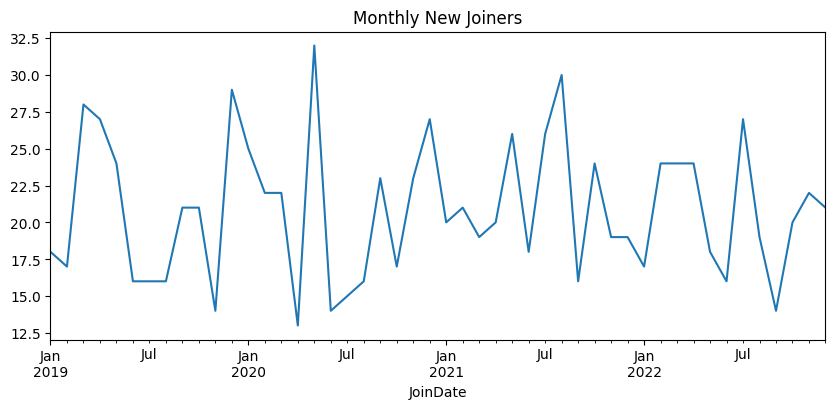

In [71]:
# Monthly new joiners
monthly_joins = df.set_index('JoinDate').resample('M')['EmployeeID'].count()
monthly_joins.plot(title='Monthly New Joiners', figsize=(10,4));

## Exercice: Sales Data Analysis

You are provided with a dataset `sales_data.csv` containing retail transactions with the following columns:

- `OrderID`: Order identifier
- `CustomerID`: Unique customer identifier
- `Product`: Product name
- `Category`: Product category
- `Quantity`: Number of units sold
- `Price`: Unit price
- `OrderDate`: Date of the order
- `Country`: Customer's country

### Tasks:

1. **Basic Exploration**:
   - Display the first 5 rows.
   - Count missing values in each column.
   - Print summary statistics for `Quantity` and `Price`.

2. **Data Cleaning**:
   - Remove rows where `Quantity` or `Price` is less than or equal to 0.
   - Convert `OrderDate` to datetime format.

3. **Feature Engineering**:
   - Create a new column `TotalAmount` = `Quantity` × `Price`.
   - Extract the `Month` and `DayOfWeek` from `OrderDate`.

4. **Analysis**:
   - What is the total revenue per `Country`? (Sort descending)
   - What are the top 5 best-selling products by `Quantity`?
   - How many unique customers are there in each `Country`?

5. **Time Series Aggregation**:
   - Plot total daily revenue (`OrderDate` vs. `TotalAmount`) using a line plot.
   - Compute the monthly average quantity sold per category.

> 💡 Use `.groupby()`, `.agg()`, `.pivot_table()`, and visualization functions where appropriate.

In [72]:
df_sales = pd.read_csv('sales_data.csv')

# TASK 1: BASIC EXPLORATION (Enhanced)

print("TASK 1: BASIC EXPLORATION")

# Display first 5 rows
print("First 5 rows:")
print(df_sales.head())

# Basic info about dataset
print("Dataset Info:")
print(f"Shape: {df_sales.shape}")

# Count missing values with percentages
print("Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Missing_Count': df_sales.isnull().sum(),
    'Missing_Percentage': (df_sales.isnull().sum() / len(df_sales)) * 100
})
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_data)

# Summary statistics for ALL numeric columns
print("Summary Statistics for Numeric Columns:")
numeric_columns = df_sales.select_dtypes(include=[np.number]).columns
print(df_sales[numeric_columns].describe())

# Data types and unique values for categorical columns
print("Categorical Columns Analysis:")
categorical_columns = df_sales.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'OrderDate':
        print(f"{col}: {df_sales[col].nunique()} unique values")
        if df_sales[col].nunique() <= 10:  # Show values if not too many
            print(f"  Values: {list(df_sales[col].unique())}")
print()

TASK 1: BASIC EXPLORATION
First 5 rows:
   OrderID  CustomerID     Product     Category  Quantity   Price   OrderDate  \
0    25795        1921      Tablet  Electronics         2   62.49  2023-04-29   
1    10860        1969      Tablet  Accessories         1  696.56  2023-05-01   
2    86820        1601  Headphones  Electronics         2  983.76  2023-01-19   
3    64886        1417     Charger  Electronics         1  242.98  2023-06-24   
4    16265        1114      Laptop  Electronics         1  146.54  2023-05-22   

   Country  
0       UK  
1  Germany  
2   France  
3  Germany  
4  Germany  

Dataset Info:
Shape: (500, 8)
Memory usage: 0.12 MB

Missing Values Analysis:
Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []

Summary Statistics for Numeric Columns:
            OrderID   CustomerID    Quantity      Price
count    500.000000   500.000000  500.000000  500.00000
mean   55825.006000  1488.114000    4.896000  507.91238
std    26748.293127   296.537691    

In [73]:
# TASK 2: DATA CLEANING

print("TASK 2: DATA CLEANING")

print("2.1 Data Quality Report - BEFORE Cleaning:")
print(f"Total rows: {len(df_sales)}")
print(f"Rows with Quantity <= 0: {(df_sales['Quantity'] <= 0).sum()}")
print(f"Rows with Price <= 0: {(df_sales['Price'] <= 0).sum()}")
print(f"Missing CustomerID: {df_sales['CustomerID'].isnull().sum()}")
print(f"Duplicate OrderIDs: {df_sales['OrderID'].duplicated().sum()}")
print()

# Remove invalid quantity and price
df_clean = df_sales[(df_sales['Quantity'] > 0) & (df_sales['Price'] > 0)].copy()

# Convert OrderDate to datetime
df_clean['OrderDate'] = pd.to_datetime(df_clean['OrderDate'])

# Handle missing CustomerIDs (option 1: drop, option 2: fill with 'UNKNOWN')
df_clean = df_clean.dropna(subset=['CustomerID'])

# Remove duplicates if any
df_clean = df_clean.drop_duplicates(subset=['OrderID'])

print("2.2 Data Quality Report - AFTER Cleaning:")
print(f"Total rows: {len(df_clean)}")
print(f"Rows removed: {len(df_sales) - len(df_clean)}")
print(f"Data loss percentage: {((len(df_sales) - len(df_clean)) / len(df_sales)) * 100:.2f}%")
print()

# Validate data ranges
print("2.3 Data Validation:")
print(f"Quantity range: {df_clean['Quantity'].min()} - {df_clean['Quantity'].max()}")
print(f"Price range: ${df_clean['Price'].min():.2f} - ${df_clean['Price'].max():.2f}")
print(f"Date range: {df_clean['OrderDate'].min().date()} to {df_clean['OrderDate'].max().date()}")

# Update df to use cleaned version
df_sales = df_clean.copy()


TASK 2: DATA CLEANING
2.1 Data Quality Report - BEFORE Cleaning:
Total rows: 500
Rows with Quantity <= 0: 0
Rows with Price <= 0: 0
Missing CustomerID: 0
Duplicate OrderIDs: 0

2.2 Data Quality Report - AFTER Cleaning:
Total rows: 500
Rows removed: 0
Data loss percentage: 0.00%

2.3 Data Validation:
Quantity range: 1 - 9
Price range: $8.20 - $998.36
Date range: 2023-01-01 to 2023-06-28



In [74]:
# TASK 3: FEATURE ENGINEERING

print("TASK 3: FEATURE ENGINEERING")

# Create TotalAmount
df_sales['TotalAmount'] = df_sales['Quantity'] * df_sales['Price']

# Extract date components
df_sales['Month'] = df_sales['OrderDate'].dt.month
df_sales['DayOfWeek'] = df_sales['OrderDate'].dt.day_name()
df_sales['Quarter'] = df_sales['OrderDate'].dt.quarter
df_sales['Year'] = df_sales['OrderDate'].dt.year
df_sales['WeekOfYear'] = df_sales['OrderDate'].dt.isocalendar().week

# Create order size categories
df_sales['OrderSize'] = pd.cut(df_sales['TotalAmount'],
                        bins=[0, 50, 200, float('inf')],
                        labels=['Small', 'Medium', 'Large'])

# Calculate customer tenure (days since first order)
customer_first_order = df_sales.groupby('CustomerID')['OrderDate'].min()
df_sales['CustomerFirstOrder'] = df_sales['CustomerID'].map(customer_first_order)
df_sales['CustomerTenure'] = (df_sales['OrderDate'] - df_sales['CustomerFirstOrder']).dt.days

# Create price categories using quantiles
df_sales['PriceCategory'] = pd.qcut(df_sales['Price'],
                             q=3,
                             labels=['Low', 'Medium', 'High'])

print("3.1 New Features Created:")
new_features = ['TotalAmount', 'Month', 'DayOfWeek', 'Quarter', 'OrderSize',
                'CustomerTenure', 'PriceCategory']
for feature in new_features:
    print(f"✓ {feature}")

print(f"\n3.2 Updated dataset shape: {df_sales.shape}")
print("\n3.3 Sample of new features:")
print(df_sales[['OrderID', 'TotalAmount', 'Month', 'DayOfWeek', 'OrderSize', 'PriceCategory']].head())


TASK 3: FEATURE ENGINEERING
3.1 New Features Created:
✓ TotalAmount
✓ Month
✓ DayOfWeek
✓ Quarter
✓ OrderSize
✓ CustomerTenure
✓ PriceCategory

3.2 Updated dataset shape: (500, 18)

3.3 Sample of new features:
   OrderID  TotalAmount  Month DayOfWeek OrderSize PriceCategory
0    25795       124.98      4  Saturday    Medium           Low
1    10860       696.56      5    Monday     Large          High
2    86820      1967.52      1  Thursday     Large          High
3    64886       242.98      6  Saturday     Large           Low
4    16265       146.54      5    Monday    Medium           Low


In [75]:
# TASK 4: MULTI-LEVEL ANALYSIS

print("TASK 4: MULTI-LEVEL ANALYSIS")

# Country Analysis
print("COUNTRY ANALYSIS:")

country_analysis = df_sales.groupby('Country').agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'CustomerID': 'nunique',
    'Quantity': 'sum'
}).round(2)

# Flatten column names
country_analysis.columns = ['Total_Revenue', 'Avg_Order_Value', 'Order_Count',
                           'Unique_Customers', 'Total_Quantity']
country_analysis = country_analysis.sort_values('Total_Revenue', ascending=False)

print("Revenue by Country (sorted descending):")
print(country_analysis)

# Product Analysis
print("PRODUCT ANALYSIS:")

# Top 5 products by quantity
top_products_qty = df_sales.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head()
print("Top 5 best-selling products by Quantity:")
for i, (product, qty) in enumerate(top_products_qty.items(), 1):
    print(f"{i}. {product}: {qty} units")
print()

# Top 5 products by revenue
top_products_revenue = df_sales.groupby('Product')['TotalAmount'].sum().sort_values(ascending=False).head()
print("Top 5 products by Revenue:")
for i, (product, revenue) in enumerate(top_products_revenue.items(), 1):
    print(f"{i}. {product}: ${revenue:,.2f}")
print()

# Average price by category
avg_price_category = df_sales.groupby('Category')['Price'].mean().sort_values(ascending=False)
print("Average price by Category:")
for category, price in avg_price_category.items():
    print(f"{category}: ${price:.2f}")

# Customer Analysis
print("CUSTOMER ANALYSIS:")

# Top 10 customers by spending
top_customers = df_sales.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
print("Top 10 customers by total spending:")
for i, (customer, spending) in enumerate(top_customers.items(), 1):
    print(f"{i}. {customer}: ${spending:,.2f}")
print()

# Customer distribution by order frequency
customer_orders = df_sales.groupby('CustomerID').size()
order_frequency = pd.cut(customer_orders,
                        bins=[0, 1, 5, float('inf')],
                        labels=['1 order', '2-5 orders', '5+ orders']).value_counts()
print("Customer distribution by order frequency:")
print(order_frequency)

TASK 4: MULTI-LEVEL ANALYSIS
COUNTRY ANALYSIS:
Revenue by Country (sorted descending):
         Total_Revenue  Avg_Order_Value  Order_Count  Unique_Customers  \
Country                                                                  
Spain        279412.27          2739.34          102                99   
USA          255293.26          2385.92          107               104   
UK           240956.09          2647.87           91                89   
Germany      237998.58          2453.59           97                95   
France       229219.37          2225.43          103                97   

         Total_Quantity  
Country                  
Spain               537  
USA                 498  
UK                  455  
Germany             458  
France              500  
PRODUCT ANALYSIS:
Top 5 best-selling products by Quantity:
1. Phone: 552 units
2. Charger: 502 units
3. Tablet: 485 units
4. Laptop: 470 units
5. Headphones: 439 units

Top 5 products by Revenue:
1. Charger: $276

TASK 5: TIME SERIES & ADVANCED AGGREGATION
TIME SERIES ANALYSIS:


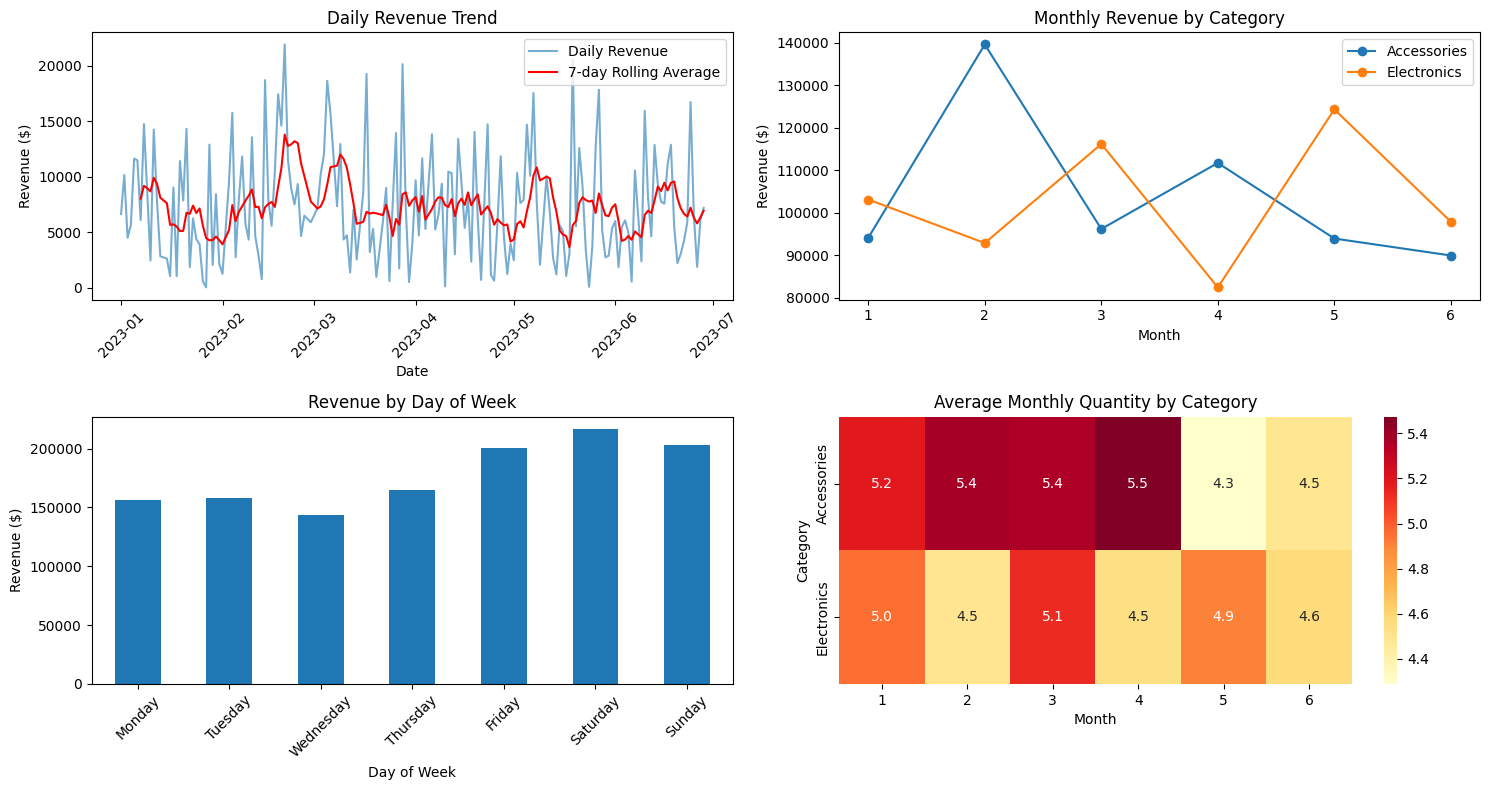


COMPLEX MULTI-LEVEL AGGREGATION:
Multi-level aggregation by Country and Category:
                    TotalAmount                Quantity       CustomerID  \
                            sum     mean count      sum  mean    nunique   
Country Category                                                           
France  Accessories   135792.66  2514.68    54      266  4.93         51   
        Electronics    93426.71  1906.67    49      234  4.78         47   
Germany Accessories   127328.61  2768.01    46      241  5.24         45   
        Electronics   110669.97  2170.00    51      217  4.25         51   
Spain   Accessories   118927.13  2378.54    50      257  5.14         50   
        Electronics   160485.14  3086.25    52      280  5.38         51   
UK      Accessories   123808.07  2751.29    45      235  5.22         45   
        Electronics   117148.02  2546.70    46      220  4.78         45   
USA     Accessories   119918.92  2262.62    53      245  4.62         53   
     

C:\Users\lemar\AppData\Local\Temp\ipykernel_44720\1242377175.py:74: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products = df_sales.groupby(['Country', 'Category']).apply(top_product_by_qty)


In [76]:
# TASK 5: TIME SERIES & ADVANCED AGGREGATION

print("TASK 5: TIME SERIES & ADVANCED AGGREGATION")
# Time Series Analysis
print("TIME SERIES ANALYSIS:")

# Daily revenue with rolling average
daily_revenue = df_sales.groupby('OrderDate')['TotalAmount'].sum().reset_index()
daily_revenue['7_day_rolling'] = daily_revenue['TotalAmount'].rolling(7).mean()

# Plot daily revenue
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
plt.plot(daily_revenue['OrderDate'], daily_revenue['TotalAmount'], alpha=0.6, label='Daily Revenue')
plt.plot(daily_revenue['OrderDate'], daily_revenue['7_day_rolling'], 'r-', label='7-day Rolling Average')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.legend()
plt.xticks(rotation=45)

# Monthly revenue by category
monthly_category = df_sales.groupby(['Month', 'Category'])['TotalAmount'].sum().reset_index()
monthly_pivot = monthly_category.pivot(index='Month', columns='Category', values='TotalAmount')

plt.subplot(2, 2, 2)
for category in monthly_pivot.columns:
    plt.plot(monthly_pivot.index, monthly_pivot[category], marker='o', label=category)
plt.title('Monthly Revenue by Category')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.legend()

# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_performance = df_sales.groupby('DayOfWeek')['TotalAmount'].sum().reindex(day_order)

plt.subplot(2, 2, 3)
weekly_performance.plot(kind='bar')
plt.title('Revenue by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)

# Monthly quantity by category
monthly_qty_category = df_sales.groupby(['Month', 'Category'])['Quantity'].mean().reset_index()
monthly_qty_pivot = monthly_qty_category.pivot(index='Month', columns='Category', values='Quantity')

plt.subplot(2, 2, 4)
sns.heatmap(monthly_qty_pivot.T, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Average Monthly Quantity by Category')
plt.xlabel('Month')
plt.ylabel('Category')

plt.tight_layout()
plt.show()

# Complex Aggregations
print("\nCOMPLEX MULTI-LEVEL AGGREGATION:")

# Multi-level aggregation by Country and Category
complex_agg = df_sales.groupby(['Country', 'Category']).agg({
    'TotalAmount': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean'],
    'CustomerID': 'nunique',
    'Price': ['min', 'max', 'mean']
}).round(2)

# Custom aggregation - top product by quantity in each group
def top_product_by_qty(group):
    return group.loc[group['Quantity'].idxmax(), 'Product']

top_products = df_sales.groupby(['Country', 'Category']).apply(top_product_by_qty)

print("Multi-level aggregation by Country and Category:")
print(complex_agg.head(10))
print("Average Customer Lifetime Value by Segment:")